In [24]:
%load_ext autoreload
%autoreload 2
from constants import *
from plot_config import *
from sample_analysis import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Failure times loading parameters
N_SAMPLES = 40
N_SEGMENTS = 6
start_id = 60
stop_id = start_id + N_SAMPLES
IDS = np.arange(start_id, stop_id)
FILE_NAMES = [f'id=00{str(id)}.h5' for id in IDS]

In [3]:
SIGMA = 3.5  # Sets the timescale of avalanches
TAU = 1.27  # Exponent of the power-law distribution of avalanche sizes

In [4]:
COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS = True
COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS = True

THRESHOLD = 1

# Number of peaks to consider when randomly selecting peaks
RANDOM_SEED = 0
N_RANDOM_PEAKS = 1500

# Number of time windows to consider when counting events
T = 30
T_START = 1e-8
T_END = 2

# Number of peak heights to consider when filtering peaks
N_H = 6
START_STD_H = 4
END_STD_H = 9
VAR_H = 0.05

In [5]:
all_failure_times, _ = load_failure_data(filenames=FILE_NAMES,
                                         directory=FAILURE_DATA_DIR,
                                         loading_segments=N_SEGMENTS,
                                         verbose=False)

for failure_times in all_failure_times:
    failure_times /= TAU_ALPHA

100%|██████████| 40/40 [03:27<00:00,  5.19s/it]


In [6]:
all_heights_stats = all_sample_heights_stats(all_failure_times=all_failure_times,
                                             sigma=SIGMA,
                                             threshold=THRESHOLD,
                                             save=True,
                                             filename=f"heights_{start_id}-{stop_id - 1}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}.pkl")

MEAN_H = all_heights_stats['mean_all_h']
STD_H = all_heights_stats['std_all_h']
all_peak_heights = all_heights_stats['all_peak_h']

print(f"Number of peaks across {N_SAMPLES} samples: {len(all_peak_heights)}")
print(f"Mean height: {MEAN_H}")
print(f"Std height: {STD_H}")

N_STD = np.linspace(START_STD_H, END_STD_H, N_H)
HEIGHTS = MEAN_H + N_STD * STD_H
print(f"Peak heights: {HEIGHTS}")

Computing heights: 100%|██████████| 40/40 [02:42<00:00,  4.05s/it]


Number of peaks across 40 samples: 8672652
Mean height: 16960262.565677613
Std height: 57276770.020237066
Peak heights: [2.46067343e+08 3.03344113e+08 3.60620883e+08 4.17897653e+08
 4.75174423e+08 5.32451193e+08]


In [ ]:
fit = powerlaw.Fit(all_peak_heights, xmin=min(all_peak_heights), xmax=max(all_peak_heights), discrete=True)
print(f"Exponent: {fit.alpha}")
print(f"Error: {fit.sigma}")

In [20]:
height_bin_infos = {
    'mean_h': MEAN_H,
    'std_h': STD_H,
    'n_std': N_STD,
    'heights': HEIGHTS,
}

HEIGHTS_dir = os.path.join(SAVE_DIR, "sample_data/heights_info")
if not os.path.exists(HEIGHTS_dir):
    os.makedirs(HEIGHTS_dir)
save_path = os.path.join(HEIGHTS_dir,
                         f"HEIGHTS_{start_id}-{stop_id - 1}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(height_bin_infos, f)

In [7]:
output_dicts = []
for i, failure_times in enumerate(all_failure_times):
    print(f"SAMPLE {i + 1}")
    output_dicts.append(
        sample_analysis(times=failure_times,
                        sigma=SIGMA,
                        threshold=THRESHOLD,
                        compute_activity_for_random_heights=COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS,
                        compute_activity_for_given_heights=COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS,
                        n_random_peaks=N_RANDOM_PEAKS,
                        heights=HEIGHTS,
                        var_h=VAR_H,
                        t_start=T_START,
                        t_stop=T_END,
                        num_time_windows=T,
                        save=True,
                        filename=f"sample_{IDS[i]}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}.pkl", )
    )
    print(f"{50 * '='}\n")

SAMPLE 1
Computing activity for random heights
- Number of random peaks =  1230
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 417, 303344112.66686296: 306, 360620882.68710005: 265, 417897652.707337: 198, 475174422.7275741: 133, 532451192.7478112: 134}
- Number of peaks after =  {246067342.64662588: 417, 303344112.66686296: 306, 360620882.68710005: 265, 417897652.707337: 198, 475174422.7275741: 133, 532451192.7478112: 134}


Computing events after peaks: 100%|██████████| 6/6 [01:02<00:00, 10.45s/it]



SAMPLE 2
Computing activity for random heights
- Number of random peaks =  1247
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 373, 303344112.66686296: 227, 360620882.68710005: 186, 417897652.707337: 141, 475174422.7275741: 125, 532451192.7478112: 93}
- Number of peaks after =  {246067342.64662588: 373, 303344112.66686296: 227, 360620882.68710005: 186, 417897652.707337: 141, 475174422.7275741: 125, 532451192.7478112: 93}


Computing events after peaks: 100%|██████████| 6/6 [00:48<00:00,  8.16s/it]



SAMPLE 3
Computing activity for random heights
- Number of random peaks =  1257
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 368, 303344112.66686296: 260, 360620882.68710005: 237, 417897652.707337: 188, 475174422.7275741: 157, 532451192.7478112: 139}
- Number of peaks after =  {246067342.64662588: 368, 303344112.66686296: 260, 360620882.68710005: 237, 417897652.707337: 188, 475174422.7275741: 157, 532451192.7478112: 139}


Computing events after peaks: 100%|██████████| 6/6 [00:59<00:00,  9.86s/it]



SAMPLE 4
Computing activity for random heights
- Number of random peaks =  1236
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 332, 303344112.66686296: 256, 360620882.68710005: 200, 417897652.707337: 180, 475174422.7275741: 128, 532451192.7478112: 106}
- Number of peaks after =  {246067342.64662588: 332, 303344112.66686296: 256, 360620882.68710005: 200, 417897652.707337: 180, 475174422.7275741: 128, 532451192.7478112: 106}


Computing events after peaks: 100%|██████████| 6/6 [00:53<00:00,  8.94s/it]



SAMPLE 5
Computing activity for random heights
- Number of random peaks =  1311
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 326, 303344112.66686296: 235, 360620882.68710005: 175, 417897652.707337: 138, 475174422.7275741: 117, 532451192.7478112: 86}
- Number of peaks after =  {246067342.64662588: 326, 303344112.66686296: 235, 360620882.68710005: 175, 417897652.707337: 138, 475174422.7275741: 117, 532451192.7478112: 86}


Computing events after peaks: 100%|██████████| 6/6 [00:46<00:00,  7.83s/it]



SAMPLE 6
Computing activity for random heights
- Number of random peaks =  1333
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 411, 303344112.66686296: 289, 360620882.68710005: 213, 417897652.707337: 165, 475174422.7275741: 143, 532451192.7478112: 113}
- Number of peaks after =  {246067342.64662588: 411, 303344112.66686296: 289, 360620882.68710005: 213, 417897652.707337: 165, 475174422.7275741: 143, 532451192.7478112: 113}


Computing events after peaks: 100%|██████████| 6/6 [00:57<00:00,  9.58s/it]



SAMPLE 7
Computing activity for random heights
- Number of random peaks =  1272
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 340, 303344112.66686296: 282, 360620882.68710005: 208, 417897652.707337: 161, 475174422.7275741: 124, 532451192.7478112: 112}
- Number of peaks after =  {246067342.64662588: 340, 303344112.66686296: 282, 360620882.68710005: 208, 417897652.707337: 161, 475174422.7275741: 124, 532451192.7478112: 112}


Computing events after peaks: 100%|██████████| 6/6 [00:57<00:00,  9.58s/it]



SAMPLE 8
Computing activity for random heights
- Number of random peaks =  1347
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 352, 303344112.66686296: 258, 360620882.68710005: 204, 417897652.707337: 135, 475174422.7275741: 120, 532451192.7478112: 74}
- Number of peaks after =  {246067342.64662588: 352, 303344112.66686296: 258, 360620882.68710005: 204, 417897652.707337: 135, 475174422.7275741: 120, 532451192.7478112: 74}


Computing events after peaks: 100%|██████████| 6/6 [00:50<00:00,  8.37s/it]



SAMPLE 9
Computing activity for random heights
- Number of random peaks =  1323
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 325, 303344112.66686296: 250, 360620882.68710005: 211, 417897652.707337: 148, 475174422.7275741: 126, 532451192.7478112: 110}
- Number of peaks after =  {246067342.64662588: 325, 303344112.66686296: 250, 360620882.68710005: 211, 417897652.707337: 148, 475174422.7275741: 126, 532451192.7478112: 110}


Computing events after peaks: 100%|██████████| 6/6 [00:51<00:00,  8.60s/it]



SAMPLE 10
Computing activity for random heights
- Number of random peaks =  1255
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 329, 303344112.66686296: 242, 360620882.68710005: 184, 417897652.707337: 144, 475174422.7275741: 134, 532451192.7478112: 76}
- Number of peaks after =  {246067342.64662588: 329, 303344112.66686296: 242, 360620882.68710005: 184, 417897652.707337: 144, 475174422.7275741: 134, 532451192.7478112: 76}


Computing events after peaks: 100%|██████████| 6/6 [00:49<00:00,  8.20s/it]



SAMPLE 11
Computing activity for random heights
- Number of random peaks =  1324
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 351, 303344112.66686296: 202, 360620882.68710005: 206, 417897652.707337: 152, 475174422.7275741: 105, 532451192.7478112: 99}
- Number of peaks after =  {246067342.64662588: 351, 303344112.66686296: 202, 360620882.68710005: 206, 417897652.707337: 152, 475174422.7275741: 105, 532451192.7478112: 99}


Computing events after peaks: 100%|██████████| 6/6 [00:49<00:00,  8.21s/it]



SAMPLE 12
Computing activity for random heights
- Number of random peaks =  1288
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 352, 303344112.66686296: 316, 360620882.68710005: 251, 417897652.707337: 188, 475174422.7275741: 127, 532451192.7478112: 107}
- Number of peaks after =  {246067342.64662588: 352, 303344112.66686296: 316, 360620882.68710005: 251, 417897652.707337: 188, 475174422.7275741: 127, 532451192.7478112: 107}


Computing events after peaks: 100%|██████████| 6/6 [00:58<00:00,  9.77s/it]



SAMPLE 13
Computing activity for random heights
- Number of random peaks =  1354
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 311, 303344112.66686296: 228, 360620882.68710005: 148, 417897652.707337: 142, 475174422.7275741: 100, 532451192.7478112: 79}
- Number of peaks after =  {246067342.64662588: 311, 303344112.66686296: 228, 360620882.68710005: 148, 417897652.707337: 142, 475174422.7275741: 100, 532451192.7478112: 79}


Computing events after peaks: 100%|██████████| 6/6 [00:45<00:00,  7.54s/it]



SAMPLE 14
Computing activity for random heights
- Number of random peaks =  1248
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 369, 303344112.66686296: 268, 360620882.68710005: 235, 417897652.707337: 163, 475174422.7275741: 125, 532451192.7478112: 103}
- Number of peaks after =  {246067342.64662588: 369, 303344112.66686296: 268, 360620882.68710005: 235, 417897652.707337: 163, 475174422.7275741: 125, 532451192.7478112: 103}


Computing events after peaks: 100%|██████████| 6/6 [00:56<00:00,  9.34s/it]



SAMPLE 15
Computing activity for random heights
- Number of random peaks =  1279
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 424, 303344112.66686296: 306, 360620882.68710005: 230, 417897652.707337: 202, 475174422.7275741: 173, 532451192.7478112: 115}
- Number of peaks after =  {246067342.64662588: 424, 303344112.66686296: 306, 360620882.68710005: 230, 417897652.707337: 202, 475174422.7275741: 173, 532451192.7478112: 115}


Computing events after peaks: 100%|██████████| 6/6 [01:03<00:00, 10.60s/it]



SAMPLE 16
Computing activity for random heights
- Number of random peaks =  1265
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 297, 303344112.66686296: 219, 360620882.68710005: 204, 417897652.707337: 133, 475174422.7275741: 113, 532451192.7478112: 98}
- Number of peaks after =  {246067342.64662588: 297, 303344112.66686296: 219, 360620882.68710005: 204, 417897652.707337: 133, 475174422.7275741: 113, 532451192.7478112: 98}


Computing events after peaks: 100%|██████████| 6/6 [00:47<00:00,  7.85s/it]



SAMPLE 17
Computing activity for random heights
- Number of random peaks =  1229
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 353, 303344112.66686296: 274, 360620882.68710005: 204, 417897652.707337: 162, 475174422.7275741: 115, 532451192.7478112: 103}
- Number of peaks after =  {246067342.64662588: 353, 303344112.66686296: 274, 360620882.68710005: 204, 417897652.707337: 162, 475174422.7275741: 115, 532451192.7478112: 103}


Computing events after peaks: 100%|██████████| 6/6 [00:53<00:00,  8.86s/it]



SAMPLE 18
Computing activity for random heights
- Number of random peaks =  1312
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 373, 303344112.66686296: 318, 360620882.68710005: 212, 417897652.707337: 166, 475174422.7275741: 130, 532451192.7478112: 119}
- Number of peaks after =  {246067342.64662588: 373, 303344112.66686296: 318, 360620882.68710005: 212, 417897652.707337: 166, 475174422.7275741: 130, 532451192.7478112: 119}


Computing events after peaks: 100%|██████████| 6/6 [00:57<00:00,  9.52s/it]



SAMPLE 19
Computing activity for random heights
- Number of random peaks =  1273
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 348, 303344112.66686296: 212, 360620882.68710005: 194, 417897652.707337: 134, 475174422.7275741: 105, 532451192.7478112: 91}
- Number of peaks after =  {246067342.64662588: 348, 303344112.66686296: 212, 360620882.68710005: 194, 417897652.707337: 134, 475174422.7275741: 105, 532451192.7478112: 91}


Computing events after peaks: 100%|██████████| 6/6 [00:48<00:00,  8.07s/it]



SAMPLE 20
Computing activity for random heights
- Number of random peaks =  1214
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 427, 303344112.66686296: 280, 360620882.68710005: 247, 417897652.707337: 210, 475174422.7275741: 170, 532451192.7478112: 132}
- Number of peaks after =  {246067342.64662588: 427, 303344112.66686296: 280, 360620882.68710005: 247, 417897652.707337: 210, 475174422.7275741: 170, 532451192.7478112: 132}


Computing events after peaks: 100%|██████████| 6/6 [01:05<00:00, 10.84s/it]



SAMPLE 21
Computing activity for random heights
- Number of random peaks =  1277
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 311, 303344112.66686296: 211, 360620882.68710005: 174, 417897652.707337: 122, 475174422.7275741: 94, 532451192.7478112: 85}
- Number of peaks after =  {246067342.64662588: 311, 303344112.66686296: 211, 360620882.68710005: 174, 417897652.707337: 122, 475174422.7275741: 94, 532451192.7478112: 85}


Computing events after peaks: 100%|██████████| 6/6 [00:43<00:00,  7.23s/it]



SAMPLE 22
Computing activity for random heights
- Number of random peaks =  1292
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 355, 303344112.66686296: 295, 360620882.68710005: 208, 417897652.707337: 165, 475174422.7275741: 123, 532451192.7478112: 105}
- Number of peaks after =  {246067342.64662588: 355, 303344112.66686296: 295, 360620882.68710005: 208, 417897652.707337: 165, 475174422.7275741: 123, 532451192.7478112: 105}


Computing events after peaks: 100%|██████████| 6/6 [00:58<00:00,  9.76s/it]



SAMPLE 23
Computing activity for random heights
- Number of random peaks =  1264
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 297, 303344112.66686296: 206, 360620882.68710005: 152, 417897652.707337: 156, 475174422.7275741: 117, 532451192.7478112: 94}
- Number of peaks after =  {246067342.64662588: 297, 303344112.66686296: 206, 360620882.68710005: 152, 417897652.707337: 156, 475174422.7275741: 117, 532451192.7478112: 94}


Computing events after peaks: 100%|██████████| 6/6 [00:54<00:00,  9.07s/it]



SAMPLE 24
Computing activity for random heights
- Number of random peaks =  1236
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 368, 303344112.66686296: 287, 360620882.68710005: 231, 417897652.707337: 163, 475174422.7275741: 144, 532451192.7478112: 115}
- Number of peaks after =  {246067342.64662588: 368, 303344112.66686296: 287, 360620882.68710005: 231, 417897652.707337: 163, 475174422.7275741: 144, 532451192.7478112: 115}


Computing events after peaks: 100%|██████████| 6/6 [00:52<00:00,  8.81s/it]



SAMPLE 25
Computing activity for random heights
- Number of random peaks =  1339
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 280, 303344112.66686296: 228, 360620882.68710005: 170, 417897652.707337: 150, 475174422.7275741: 130, 532451192.7478112: 78}
- Number of peaks after =  {246067342.64662588: 280, 303344112.66686296: 228, 360620882.68710005: 170, 417897652.707337: 150, 475174422.7275741: 130, 532451192.7478112: 78}


Computing events after peaks: 100%|██████████| 6/6 [01:03<00:00, 10.62s/it]



SAMPLE 26
Computing activity for random heights
- Number of random peaks =  1258
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 335, 303344112.66686296: 277, 360620882.68710005: 224, 417897652.707337: 168, 475174422.7275741: 132, 532451192.7478112: 117}
- Number of peaks after =  {246067342.64662588: 335, 303344112.66686296: 277, 360620882.68710005: 224, 417897652.707337: 168, 475174422.7275741: 132, 532451192.7478112: 117}


Computing events after peaks: 100%|██████████| 6/6 [02:39<00:00, 26.60s/it]



SAMPLE 27
Computing activity for random heights
- Number of random peaks =  1313
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 368, 303344112.66686296: 268, 360620882.68710005: 194, 417897652.707337: 158, 475174422.7275741: 136, 532451192.7478112: 114}
- Number of peaks after =  {246067342.64662588: 368, 303344112.66686296: 268, 360620882.68710005: 194, 417897652.707337: 158, 475174422.7275741: 136, 532451192.7478112: 114}


Computing events after peaks: 100%|██████████| 6/6 [00:51<00:00,  8.61s/it]



SAMPLE 28
Computing activity for random heights
- Number of random peaks =  1274
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 336, 303344112.66686296: 246, 360620882.68710005: 221, 417897652.707337: 135, 475174422.7275741: 112, 532451192.7478112: 74}
- Number of peaks after =  {246067342.64662588: 336, 303344112.66686296: 246, 360620882.68710005: 221, 417897652.707337: 135, 475174422.7275741: 112, 532451192.7478112: 74}


Computing events after peaks: 100%|██████████| 6/6 [00:45<00:00,  7.63s/it]



SAMPLE 29
Computing activity for random heights
- Number of random peaks =  1221
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 353, 303344112.66686296: 279, 360620882.68710005: 195, 417897652.707337: 189, 475174422.7275741: 147, 532451192.7478112: 122}
- Number of peaks after =  {246067342.64662588: 353, 303344112.66686296: 279, 360620882.68710005: 195, 417897652.707337: 189, 475174422.7275741: 147, 532451192.7478112: 122}


Computing events after peaks: 100%|██████████| 6/6 [01:02<00:00, 10.48s/it]



SAMPLE 30
Computing activity for random heights
- Number of random peaks =  1262
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 420, 303344112.66686296: 307, 360620882.68710005: 255, 417897652.707337: 198, 475174422.7275741: 142, 532451192.7478112: 130}
- Number of peaks after =  {246067342.64662588: 420, 303344112.66686296: 307, 360620882.68710005: 255, 417897652.707337: 198, 475174422.7275741: 142, 532451192.7478112: 130}


Computing events after peaks: 100%|██████████| 6/6 [01:04<00:00, 10.80s/it]



SAMPLE 31
Computing activity for random heights
- Number of random peaks =  1312
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 360, 303344112.66686296: 299, 360620882.68710005: 208, 417897652.707337: 165, 475174422.7275741: 146, 532451192.7478112: 128}
- Number of peaks after =  {246067342.64662588: 360, 303344112.66686296: 299, 360620882.68710005: 208, 417897652.707337: 165, 475174422.7275741: 146, 532451192.7478112: 128}


Computing events after peaks: 100%|██████████| 6/6 [00:57<00:00,  9.67s/it]



SAMPLE 32
Computing activity for random heights
- Number of random peaks =  1270
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 310, 303344112.66686296: 219, 360620882.68710005: 177, 417897652.707337: 139, 475174422.7275741: 115, 532451192.7478112: 70}
- Number of peaks after =  {246067342.64662588: 310, 303344112.66686296: 219, 360620882.68710005: 177, 417897652.707337: 139, 475174422.7275741: 115, 532451192.7478112: 70}


Computing events after peaks: 100%|██████████| 6/6 [00:45<00:00,  7.53s/it]



SAMPLE 33
Computing activity for random heights
- Number of random peaks =  1248
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 305, 303344112.66686296: 237, 360620882.68710005: 184, 417897652.707337: 138, 475174422.7275741: 97, 532451192.7478112: 81}
- Number of peaks after =  {246067342.64662588: 305, 303344112.66686296: 237, 360620882.68710005: 184, 417897652.707337: 138, 475174422.7275741: 97, 532451192.7478112: 81}


Computing events after peaks: 100%|██████████| 6/6 [00:47<00:00,  7.99s/it]



SAMPLE 34
Computing activity for random heights
- Number of random peaks =  1312
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 284, 303344112.66686296: 232, 360620882.68710005: 180, 417897652.707337: 141, 475174422.7275741: 99, 532451192.7478112: 91}
- Number of peaks after =  {246067342.64662588: 284, 303344112.66686296: 232, 360620882.68710005: 180, 417897652.707337: 141, 475174422.7275741: 99, 532451192.7478112: 91}


Computing events after peaks: 100%|██████████| 6/6 [00:43<00:00,  7.29s/it]



SAMPLE 35
Computing activity for random heights
- Number of random peaks =  1291
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 350, 303344112.66686296: 315, 360620882.68710005: 207, 417897652.707337: 180, 475174422.7275741: 164, 532451192.7478112: 133}
- Number of peaks after =  {246067342.64662588: 350, 303344112.66686296: 315, 360620882.68710005: 207, 417897652.707337: 180, 475174422.7275741: 164, 532451192.7478112: 133}


Computing events after peaks: 100%|██████████| 6/6 [00:56<00:00,  9.36s/it]



SAMPLE 36
Computing activity for random heights
- Number of random peaks =  1250
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 323, 303344112.66686296: 263, 360620882.68710005: 218, 417897652.707337: 156, 475174422.7275741: 135, 532451192.7478112: 124}
- Number of peaks after =  {246067342.64662588: 323, 303344112.66686296: 263, 360620882.68710005: 218, 417897652.707337: 156, 475174422.7275741: 135, 532451192.7478112: 124}


Computing events after peaks: 100%|██████████| 6/6 [00:50<00:00,  8.45s/it]



SAMPLE 37
Computing activity for random heights
- Number of random peaks =  1334
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 314, 303344112.66686296: 232, 360620882.68710005: 207, 417897652.707337: 166, 475174422.7275741: 107, 532451192.7478112: 124}
- Number of peaks after =  {246067342.64662588: 314, 303344112.66686296: 232, 360620882.68710005: 207, 417897652.707337: 166, 475174422.7275741: 107, 532451192.7478112: 124}


Computing events after peaks: 100%|██████████| 6/6 [00:47<00:00,  7.85s/it]



SAMPLE 38
Computing activity for random heights
- Number of random peaks =  1288
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 388, 303344112.66686296: 310, 360620882.68710005: 235, 417897652.707337: 176, 475174422.7275741: 140, 532451192.7478112: 129}
- Number of peaks after =  {246067342.64662588: 388, 303344112.66686296: 310, 360620882.68710005: 235, 417897652.707337: 176, 475174422.7275741: 140, 532451192.7478112: 129}


Computing events after peaks: 100%|██████████| 6/6 [00:58<00:00,  9.80s/it]



SAMPLE 39
Computing activity for random heights
- Number of random peaks =  1266
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 291, 303344112.66686296: 246, 360620882.68710005: 152, 417897652.707337: 130, 475174422.7275741: 105, 532451192.7478112: 101}
- Number of peaks after =  {246067342.64662588: 291, 303344112.66686296: 246, 360620882.68710005: 152, 417897652.707337: 130, 475174422.7275741: 105, 532451192.7478112: 101}


Computing events after peaks: 100%|██████████| 6/6 [00:43<00:00,  7.23s/it]



SAMPLE 40
Computing activity for random heights
- Number of random peaks =  1284
Computing activity for given heights
- Number of peaks before =  {246067342.64662588: 375, 303344112.66686296: 298, 360620882.68710005: 240, 417897652.707337: 182, 475174422.7275741: 169, 532451192.7478112: 107}
- Number of peaks after =  {246067342.64662588: 375, 303344112.66686296: 298, 360620882.68710005: 240, 417897652.707337: 182, 475174422.7275741: 169, 532451192.7478112: 107}


Computing events after peaks: 100%|██████████| 6/6 [00:59<00:00,  9.88s/it]

In [8]:
if COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS:
    random_time_windows = output_dicts[0]['random_time_windows']

    all_random_n_before = np.concatenate([output_dicts[i]['random_n_before'] for i in range(N_SAMPLES)], axis=0)
    mean_random_n_before = np.mean(all_random_n_before, axis=0)
    std_random_n_before = np.std(all_random_n_before, axis=0, ddof=1)

    all_random_n_after = np.concatenate([output_dicts[i]['random_n_after'] for i in range(N_SAMPLES)], axis=0)
    mean_random_n_after = np.mean(all_random_n_after, axis=0)
    std_random_n_after = np.std(all_random_n_after, axis=0, ddof=1)

    all_random_n_peaks = np.sum([output_dicts[i]['n_random_peaks'] for i in range(N_SAMPLES)], axis=0)

    random_activity_before = all_random_n_before / random_time_windows
    mean_random_activity_before = np.mean(random_activity_before, axis=0)
    std_random_activity_before = np.std(random_activity_before, axis=0, ddof=1)

    random_activity_after = all_random_n_after / random_time_windows
    mean_random_activity_after = np.mean(random_activity_after, axis=0)
    std_random_activity_after = np.std(random_activity_after, axis=0, ddof=1)

In [9]:
# Concatenate across samples for the same peak height
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    time_windows = output_dicts[0]['time_windows']

    all_n_before = [output_dicts[i]['n_before'] for i in range(N_SAMPLES)]
    all_n_before = concatenate_result(all_n_before, HEIGHTS, N_SAMPLES)
    mean_n_before = {h: np.mean(all_n_before[h], axis=0) for h in HEIGHTS}
    std_n_before = {h: np.std(all_n_before[h], axis=0, ddof=1) for h in HEIGHTS}

    all_n_after = [output_dicts[i]['n_after'] for i in range(N_SAMPLES)]
    all_n_after = concatenate_result(all_n_after, HEIGHTS, N_SAMPLES)
    mean_n_after = {h: np.mean(all_n_after[h], axis=0) for h in HEIGHTS}
    std_n_after = {h: np.std(all_n_after[h], axis=0, ddof=1) for h in HEIGHTS}

    all_n_peaks = [output_dicts[i]['n_peaks'] for i in range(N_SAMPLES)]
    all_n_peaks = {h: np.sum([all_n_peaks[i][h] for i in range(N_SAMPLES)]) for h in HEIGHTS}

    activity_before = {h: all_n_before[h] / time_windows for h in HEIGHTS}
    mean_activity_before = {h: np.mean(activity_before[h], axis=0) for h in HEIGHTS}
    std_activity_before = {h: np.std(activity_before[h], axis=0, ddof=1) for h in HEIGHTS}

    activity_after = {h: all_n_after[h] / time_windows for h in HEIGHTS}
    mean_activity_after = {h: np.mean(activity_after[h], axis=0) for h in HEIGHTS}
    std_activity_after = {h: np.std(activity_after[h], axis=0, ddof=1) for h in HEIGHTS}

    normalized_mean_activity_before = {h: mean_activity_before[h] / mean_activity_before[h][0] for h in HEIGHTS}
    normalized_mean_activity_after = {h: mean_activity_after[h] / mean_activity_after[h][0] for h in HEIGHTS}

# Distribution of Peak Heights

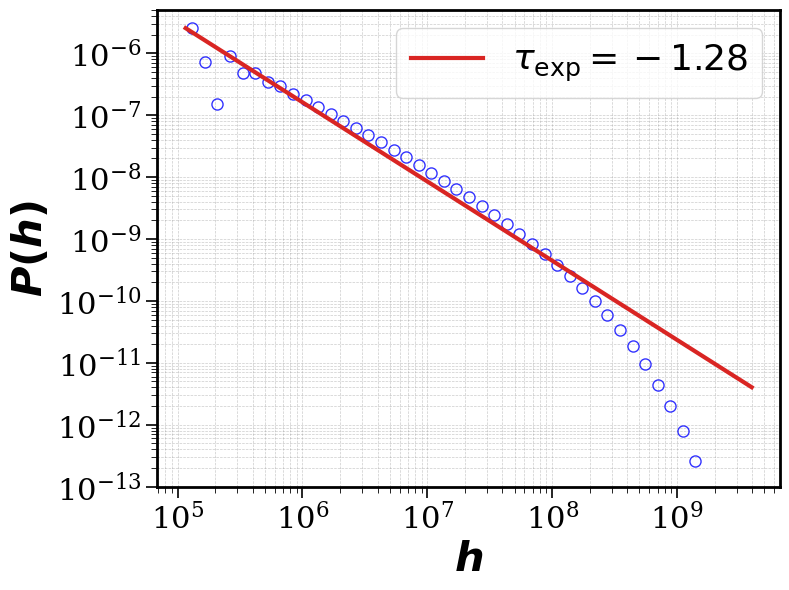

In [267]:
c_red = plt.get_cmap('Reds')
c_blue = plt.get_cmap('Blues')
c = ['blue', c_red(0.7)]
fig, ax = plt.subplots(figsize=(8, 6))
fit.plot_pdf(color=c[0], marker='o', linestyle='None', fillstyle='none', ax=ax, markersize=8, alpha=0.8)
fit.power_law.plot_pdf(color=c[1], linestyle='-', ax=ax , label=rf'$\tau_{{\rm exp}}=-{fit.alpha:.2f}$', linewidth=3)
ax.set_xlabel(r'$\boldsymbol{h}$')
ax.set_ylabel(r'$\boldsymbol{P(h)}$')
ax.legend()
plt.grid(True, alpha=0.4, linestyle='--', which='both')
plt.ylim(1e-13, 5e-6)
plt.tight_layout()

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'heights_pdf.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'heights_pdf.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()

# Mean Activity for Random Peak Heights

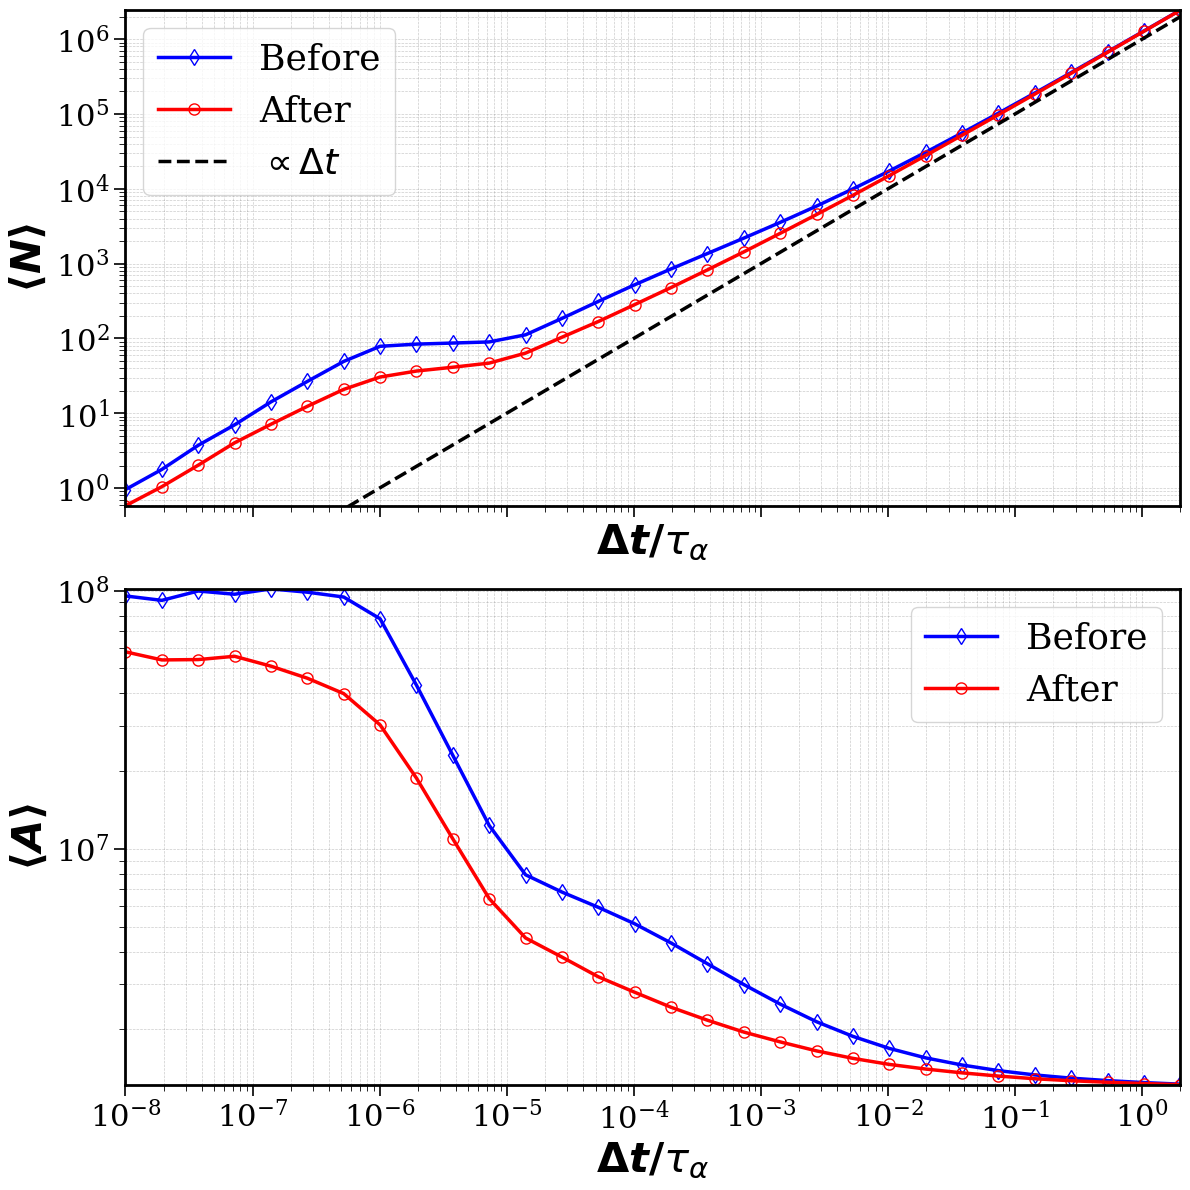

In [268]:
if COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS:
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
    axs[0].plot(random_time_windows, mean_random_n_before, marker='d', fillstyle='none', linestyle='-', color='b', label='Before', markersize=8)
    axs[0].plot(random_time_windows, mean_random_n_after, marker='o', fillstyle='none', linestyle='-', color='r', label='After', markersize=8)
    axs[0].plot(random_time_windows, 1e6 * random_time_windows, linestyle='--', color='black',
                label=r'$\propto \Delta t$')
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N \rangle}$')
    axs[0].set_xlim(min(random_time_windows), max(random_time_windows))
    axs[0].set_ylim(min([mean_random_n_before.min(), mean_random_n_after.min()]),
                    max([mean_random_n_before.max(), mean_random_n_after.max()]))
    axs[0].legend(loc='best')
    axs[0].grid(True, alpha=0.4, which='both', ls='--')



    axs[1].plot(random_time_windows, mean_random_activity_before,marker='d', fillstyle='none', linestyle='-', color='b', label='Before', markersize=8)
    axs[1].plot(random_time_windows, mean_random_activity_after, marker='o',   fillstyle='none', linestyle='-', color='r', label='After', markersize=8)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A \rangle}$')
    axs[1].set_xlim(min(random_time_windows), max(random_time_windows))
    axs[1].set_ylim(min([mean_random_activity_before.min(), mean_random_activity_after.min()]),
                    max([mean_random_activity_before.max(), mean_random_activity_after.max()]))
    axs[1].legend(loc='best')
    axs[1].grid(True, alpha=0.4, which='both', ls='--')

    plt.tight_layout()
    
    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time_random.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time_random.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    
    plt.show()

# Mean Activity for Given Peak Heights

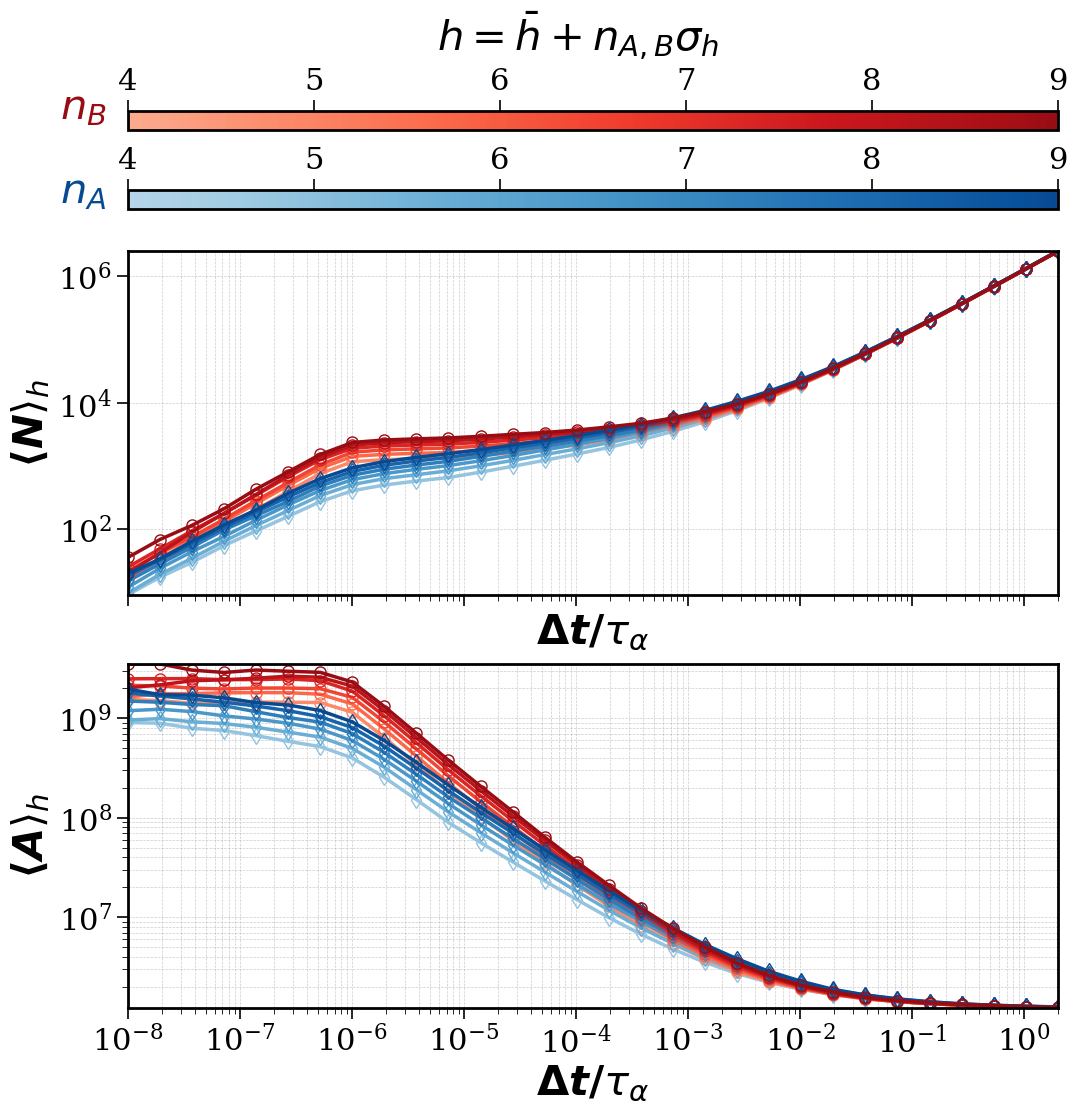

In [277]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.9, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.9, N_H))

    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0].plot(time_windows, mean_n_after[h], linestyle='-', markersize=8,
                    marker=r'd', fillstyle='none', color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')
        axs[0].plot(time_windows, mean_n_before[h], linestyle='-', markersize=8, fillstyle='none',
                    marker='o', color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')
        axs[1].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none',
                    color=colors_after[i], markersize=8)
        axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i],
                    markersize=8)

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.4, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.4, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(
        min([mean_activity_before[h].min() for h in HEIGHTS] + [mean_activity_after[h].min() for h in HEIGHTS]),
        max([mean_activity_before[h].max() for h in HEIGHTS] + [mean_activity_after[h].max() for h in HEIGHTS]))

    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.3, 0.9, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.3, 0.9, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    
    plt.show()

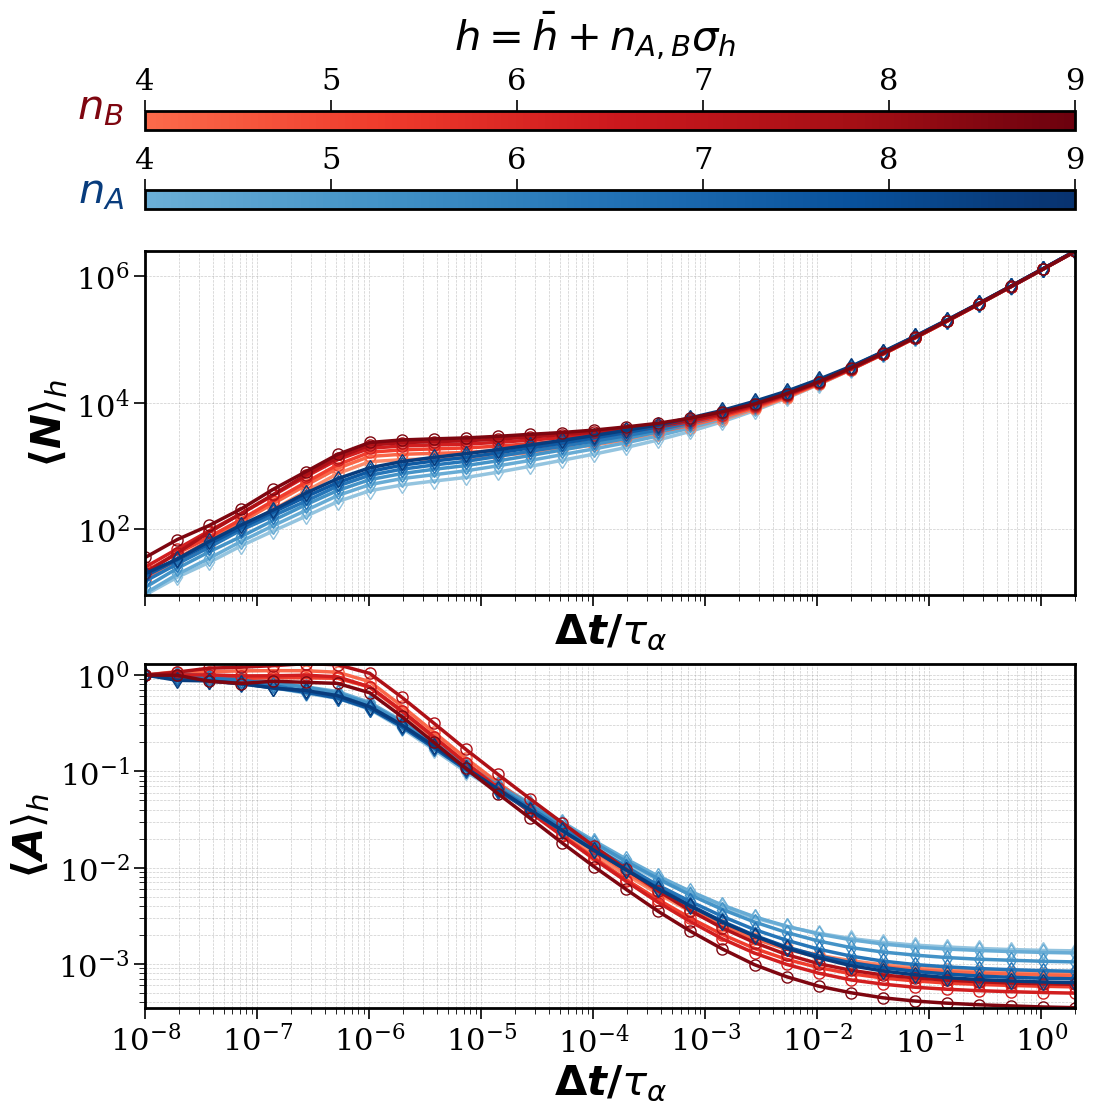

In [270]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0].plot(time_windows, mean_n_after[h], linestyle='-', 
                    markersize=8, marker=r'd', fillstyle='none', 
                    color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')
        
        axs[0].plot(time_windows, mean_n_before[h], linestyle='-', 
                    markersize=8, fillstyle='none', marker='o', 
                    color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')
        
        axs[1].plot(time_windows, normalized_mean_activity_after[h], linestyle='-', 
                    marker=r'd', fillstyle='none', markersize=8,
                    color=colors_after[i])
        axs[1].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i],
                    markersize=8)

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.4, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.4, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(
        min([normalized_mean_activity_before[h].min() for h in HEIGHTS] + [normalized_mean_activity_after[h].min() for h
                                                                           in HEIGHTS]),
        max([normalized_mean_activity_before[h].max() for h in HEIGHTS] + [normalized_mean_activity_after[h].max() for h
                                                                           in HEIGHTS]))
    
    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.5, 0.99, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.5, 0.99, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')
    
    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'norm_activity_vs_time.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    plt.show()

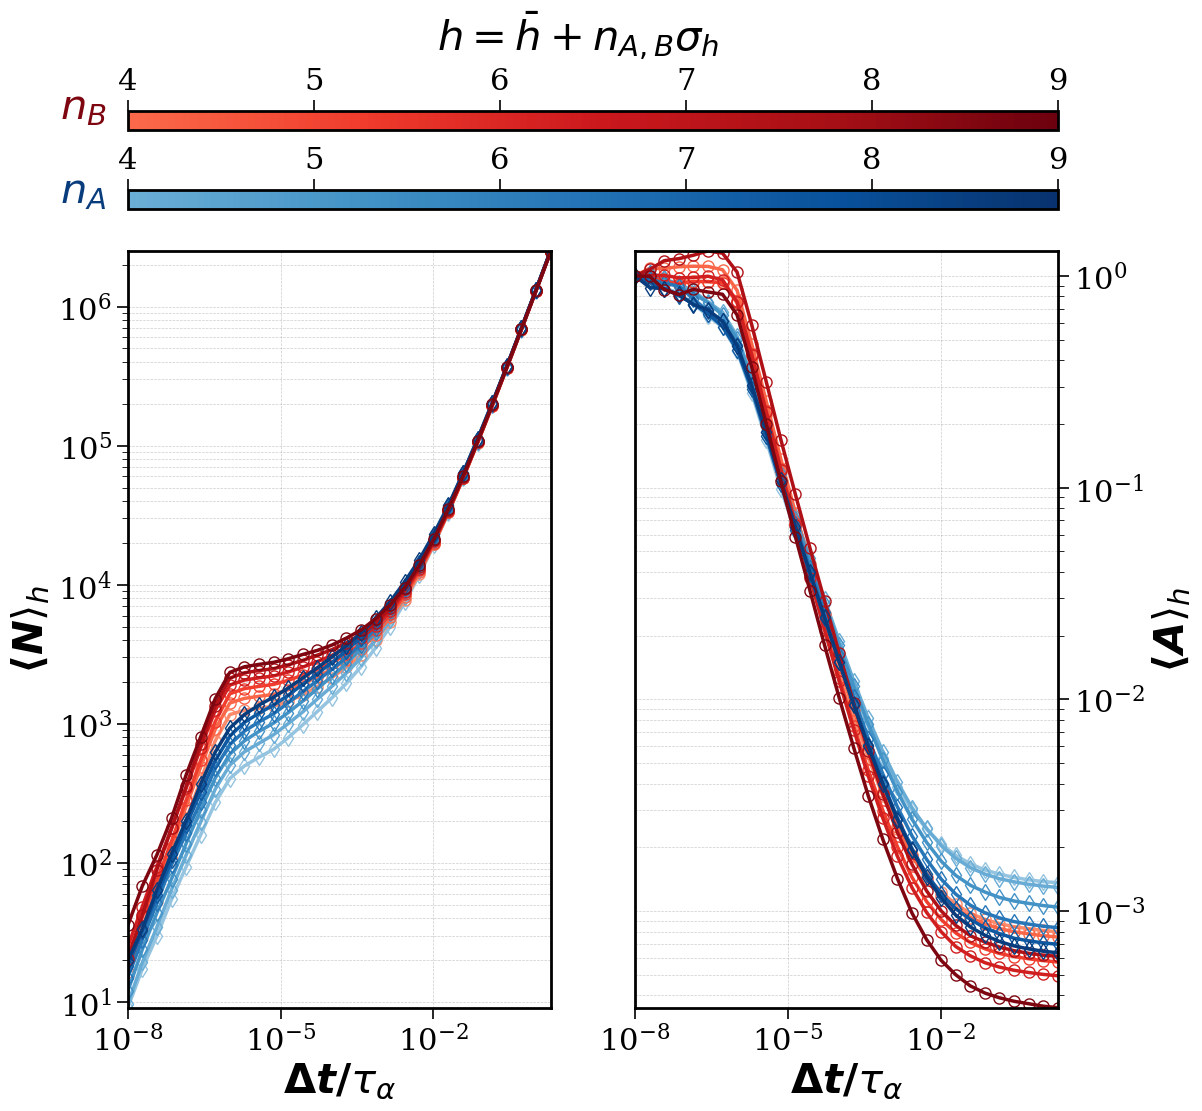

In [271]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
        cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

    fig, axs = plt.subplots(1, 2, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0].plot(time_windows, mean_n_after[h], linestyle='-',
                    markersize=8, marker=r'd', fillstyle='none',
                    color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')

        axs[0].plot(time_windows, mean_n_before[h], linestyle='-',
                    markersize=8, fillstyle='none', marker='o',
                    color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')

        axs[1].plot(time_windows, normalized_mean_activity_after[h], linestyle='-',
                    marker=r'd', fillstyle='none', markersize=8,
                    color=colors_after[i])
        axs[1].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i],
                    markersize=8)

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.4, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.4, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(
        min([normalized_mean_activity_before[h].min() for h in HEIGHTS] + [normalized_mean_activity_after[h].min() for h
                                                                           in HEIGHTS]),
        max([normalized_mean_activity_before[h].max() for h in HEIGHTS] + [normalized_mean_activity_after[h].max() for h
                                                                           in HEIGHTS]))
    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position("right")

    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.5, 0.99, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.5, 0.99, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time2.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'norm_activity_vs_time2.pkl'), 'wb') as f:
            pickle.dump(fig, f)

    plt.show()

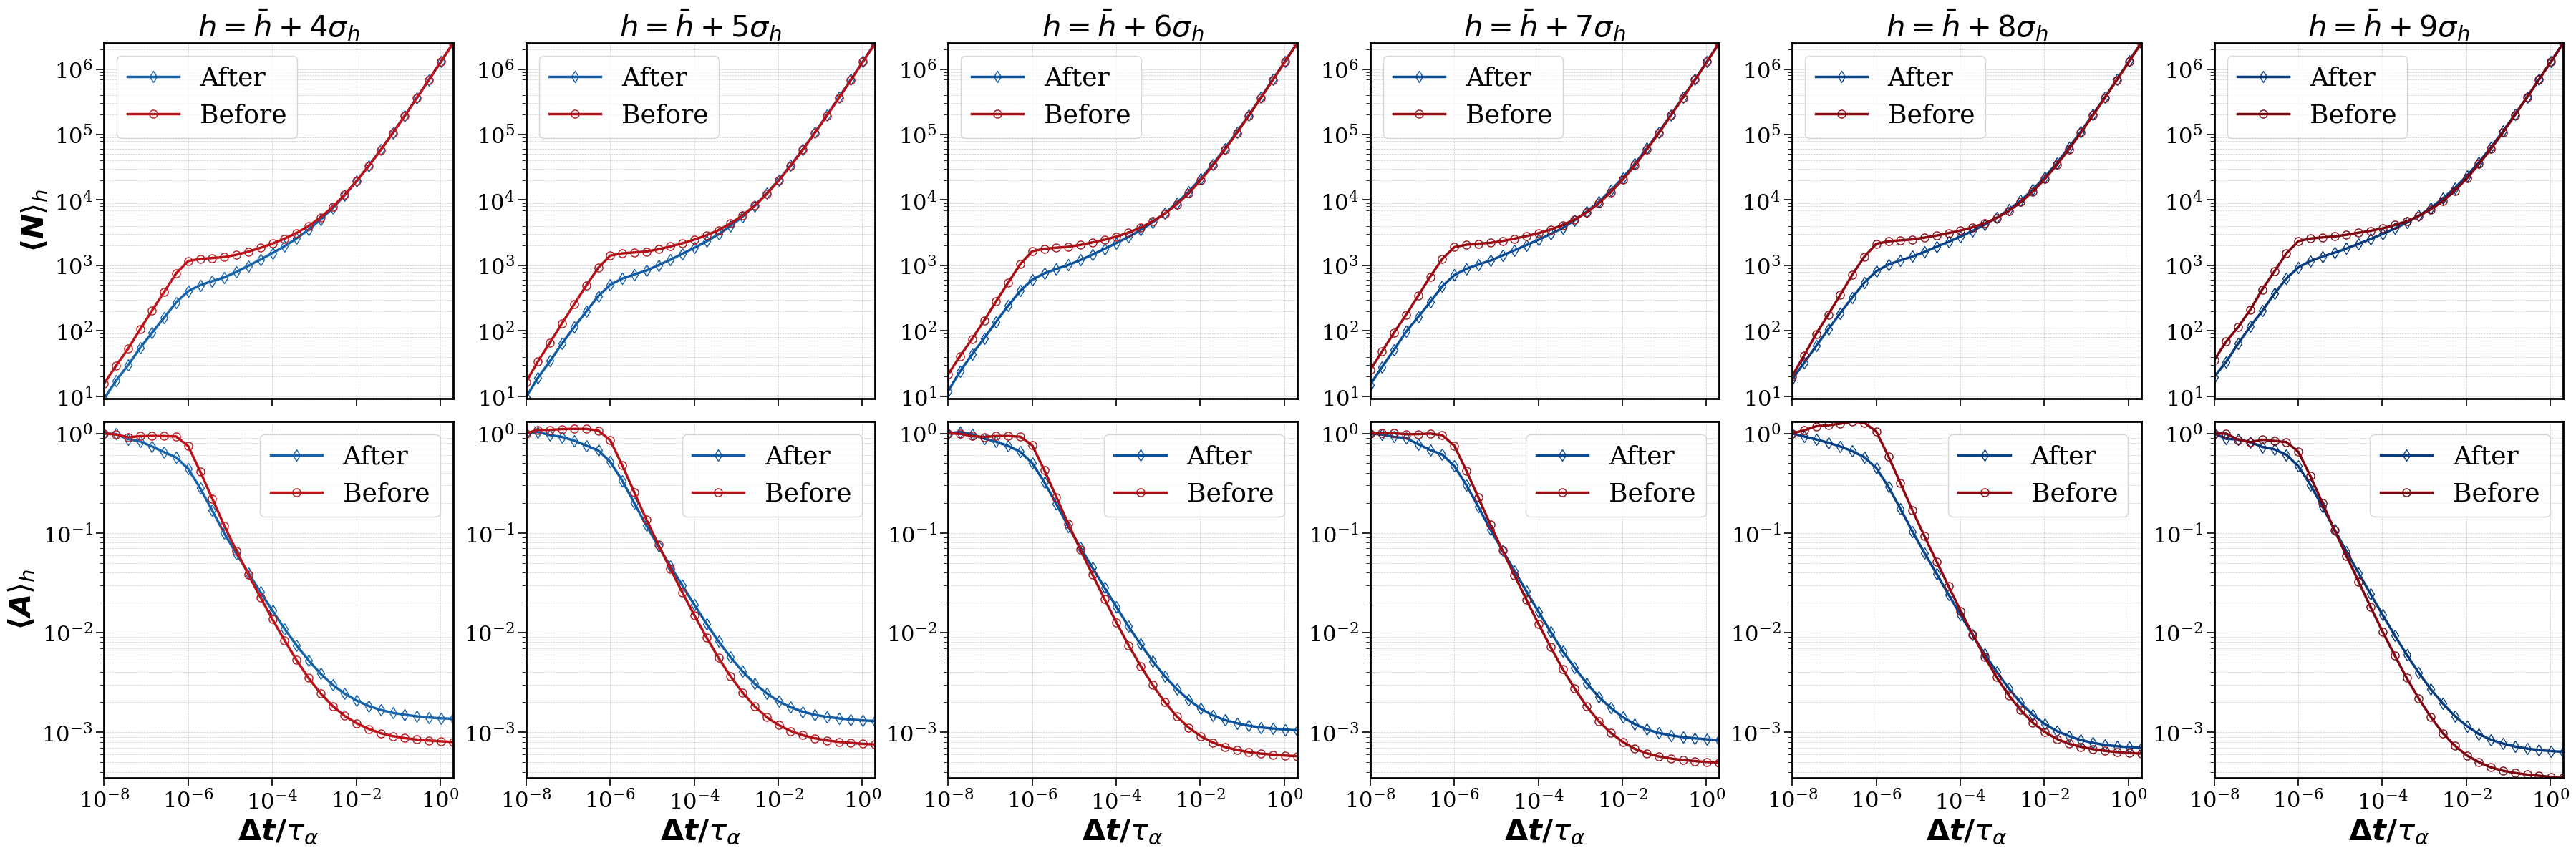

In [278]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.8, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.8, 0.95, N_H))
    
    fig, axs = plt.subplots(2, N_H, figsize=(6*N_H, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0, i].plot(time_windows, mean_n_after[h], linestyle='-', markersize=8, fillstyle='none',
                    marker=r'd', color=colors_after[i], label='After')
        axs[0, i].plot(time_windows, mean_n_before[h], linestyle='-', markersize=8, fillstyle='none',
                    marker='o', color=colors_before[i], label='Before')
        axs[1, i].plot(time_windows, normalized_mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none',
                    color=colors_after[i], markersize=8, label='After')
        axs[1, i].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', color=colors_before[i],
                    markersize=8, fillstyle='none', label='Before')

        axs[0, i].set_xscale('log')
        axs[0, i].set_yscale('log')
        axs[0, i].set_title(rf'$h=\bar h+{n_std:.0f}\sigma_h$')
        axs[0, i].grid(True, alpha=0.4, which='both', ls='--')
        axs[0, i].legend(loc='upper left')
        axs[0, i].set_xlim(min(time_windows), max(time_windows))
        axs[0, i].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                        max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))
        
        axs[1, i].set_xscale('log')
        axs[1, i].set_yscale('log')
        axs[1, i].legend(loc='upper right')
        axs[1, i].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
        axs[1, i].grid(True, alpha=0.4, which='both', ls='--')
        axs[1, i].set_xlim(min(time_windows), max(time_windows))
        axs[1, i].set_ylim(min([normalized_mean_activity_before[h].min() for h in HEIGHTS] 
                               + [normalized_mean_activity_after[h].min() for h in HEIGHTS]), 
                           max([normalized_mean_activity_before[h].max() for h in HEIGHTS] 
                               + [normalized_mean_activity_after[h].max() for h in HEIGHTS]))
        
    axs[0, 0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[1, 0].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')

    plt.tight_layout()
    
    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time_all.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'norm_activity_vs_time_all.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    
    plt.show()